<a href="https://colab.research.google.com/github/priba/tutorial_notebook/blob/main/aerfai_summer_school_2021/AERFAI_summer_school_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Graph Neural Networks for Pattern Recognition
## AERFAI - Online Summer School on Pattern Recognition and Machine Learning

[![View on Github](https://img.shields.io/static/v1.svg?logo=github&label=Repo&message=View%20On%20Github&color=lightgrey)](https://github.com/priba/tutorial_notebook/blob/main/aerfai_summer_school_2021/AERFAI_summer_school_2021.ipynb)

---

Graph Neural Networks (GNNs) have recently gained increasing popularity due to its novel uses in different domains such as Computer Vision, Natural Language Processing, Chemistry, Social Networks or Knowledge Graphs. In this tutorial, we will cover the basic usage of GNN for the problem of node or graph classification. In particular, we will build a GNN from scratch to understand the explained notation and concepts. Later, we will use the provided implementations of several GNN to check the difference in performance.

We will use [PyTorch](https://pytorch.org/) as our Deep Learning framework and the [Deep Graph Library (DGL)](https://www.dgl.ai/) as our GNN library.

## Prepare environment

Let's start preparing the environment we will use all over the session. First we will change the runtime to work on GPUs and later, we will install all the required libraries.

### Change runtime of notebook to GPU


```
  Select Runtime -> Change Runtime type -> select runtime python 3 and hardward accelerator GPU
```

### Install requirements

The basic libraries that will be used are:

*   [Network](https://networkx.github.io/)
*   [Pytorch](https://pytorch.org/)
*   [DGL](https://www.dgl.ai/)



In [13]:
!pip3 install torch
!pip3 install dgl-cu110

## Get the Data

The DGL provides several classes for reading graphs!

Check:  https://docs.dgl.ai/api/python/dgl.data.html

In the following sections we will see how we can load their data, and how it is represented. Finally, we will review how to use a custom dataset.

### Mini Graph Classification Dataset (MiniGCDataset)

This dataset is synthetic and we should define de number and size of the graphs for each set (train, validation and test).

*   class 0 : cycle graph
*   class 1 : star graph
*   class 2 : wheel graph
*   class 3 : lollipop graph
*   class 4 : hypercube graph
*   class 5 : grid graph
*   class 6 : clique graph
*   class 7 : circular ladder graph

Graph(num_nodes=16, num_edges=80,
      ndata_schemes={}
      edata_schemes={})
{}
{}


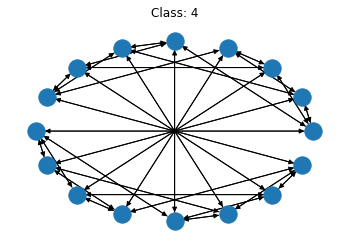

In [14]:
import dgl
import networkx as nx
import matplotlib.pyplot as plt 

dgl.backend = 'pytorch'

dataset = dgl.data.MiniGCDataset(100, 23, 50)
# Transfer NetworkX graph with the corresponding attributes
g, label = dataset[50]

# Data structure
print(g)

# Node Information (empty in the case of MiniGCDataset)
print(g.ndata)

# Edge Information (empty in the case of simple graphs such as Letters)
print(g.edata)

# Plot
fig, ax = plt.subplots()
G = g.to_networkx()
nx.draw(G, ax=ax, pos=nx.circular_layout(G))
ax.set_title('Class: {:d}'.format(label))
plt.show()

### Graph kernel dataset

It allows loading the data from: ENZYMES, DD, COLLAB and MUTAG

Graph(num_nodes=26, num_edges=60,
      ndata_schemes={'_ID': Scheme(shape=(), dtype=torch.int64), 'node_labels': Scheme(shape=(1,), dtype=torch.int64)}
      edata_schemes={'_ID': Scheme(shape=(), dtype=torch.int64), 'edge_labels': Scheme(shape=(1,), dtype=torch.int64)})
{'_ID': tensor([888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901,
        902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913]), 'node_labels': tensor([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [2],
        [2],
        [1],
        [2],
        [2]])}
{'_ID': tensor([1971, 1991, 1970, 1973, 1972, 1975, 1985, 1974, 1977, 2025, 1976, 1979,
        1978, 1981, 1980, 1983, 2007, 1982, 1984, 1987, 1986, 1989, 2001, 1988,
        1990, 1993, 1992, 1995, 1994, 1997, 1996

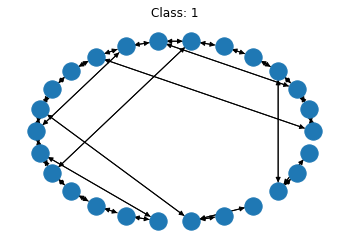

In [15]:
dataset = dgl.data.TUDataset('MUTAG')
# Transfer NetworkX graph with the corresponding attributes
g, label = dataset[50]

# Data structure
print(g)

# Node Information (empty in the case of MiniGCDataset)
print(g.ndata)

# Edge Information (empty in the case of simple graphs such as Letters)
print(g.edata)

# Label
print(label)

# Plot
fig, ax = plt.subplots()
G = g.to_networkx()
nx.draw(G, ax=ax, pos=nx.circular_layout(G))
ax.set_title('Class: {:d}'.format(label.item()))
plt.show()

### Cora Graph Dataset

Is a citation network graph.

Nodes mean paper and edges mean citation relationships. Each node has a predefined feature with 1433 dimensions. The dataset is designed for the node classification task. The task is to predict the category of certain paper.

  NumNodes: 2708
  NumEdges: 10556
  NumFeats: 1433
  NumClasses: 7
  NumTrainingSamples: 140
  NumValidationSamples: 500
  NumTestSamples: 1000
Done loading data from cached files.
Graph(num_nodes=2708, num_edges=10556,
      ndata_schemes={'feat': Scheme(shape=(1433,), dtype=torch.float32), 'label': Scheme(shape=(), dtype=torch.int64), 'test_mask': Scheme(shape=(), dtype=torch.bool), 'train_mask': Scheme(shape=(), dtype=torch.bool), 'val_mask': Scheme(shape=(), dtype=torch.bool)}
      edata_schemes={})
{'feat': tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]), 'label': tensor([3, 4, 4,  ..., 3, 3, 3]), 'test_mask': tensor([False, False, False,  ...,  True,  True,  True]), 'train_mask': tensor([ True,  True,  True,  ..., False, False, False]), 'val_mask': tensor([False, False, False

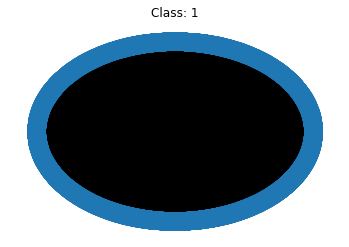

In [16]:
dataset = dgl.data.CoraGraphDataset()

# Transfer NetworkX graph with the corresponding attributes
g = dataset[0]

# Data structure
print(g)

# Node Information (empty in the case of MiniGCDataset)
print(g.ndata)

# Edge Information (empty in the case of simple graphs such as Letters)
print(g.edata)

# Node classification dataset divides the nodes into training, validation and test sets
print(g.ndata['train_mask'])
print(g.ndata['val_mask'])
print(g.ndata['test_mask'])

# Plot
fig, ax = plt.subplots()
G = g.to_networkx()
nx.draw(G, ax=ax, pos=nx.circular_layout(G))
ax.set_title('Class: {:d}'.format(label.item()))
plt.show()

### To Define a custom Dataset
Pytorch provides an abstract class representig a dataset, ```torch.utils.data.Dataset```. We need to override two methods:

*   ```__len__``` so that ```len(dataset)``` returns the size of the dataset.
*   ```__getitem__``` to support the indexing such that ```dataset[i]``` can be used to get i-th sample

Let us see how we can deal with a custom dataset.


#### Letter Database

Graphs that represent distorted letter drawings. They consider the 15 capital letters of the Roman alphabet that consist of straight lines only (A, E, F, H, I, K, L, M, N, T, V, W, X, Y, Z). Each node is labeled with a two-dimensional attribute giving its position relative to a reference coordinate system. Edges are unlabeled. The graph database consists of a training set, a validation set, and a test set of size 750 each. Also, three levels of distortions are provided.

This dataset is part of [IAM Graph Database Repository](http://www.fki.inf.unibe.ch/databases/iam-graph-database) and it is also linked in the [IAPR TC15 resources](https://iapr-tc15.greyc.fr/links.html).

It can be considered as a **TOY EXAMPLE** for graph classification.

> Riesen, K. and Bunke, H.: [IAM Graph Database Repository for Graph Based Pattern Recognition and Machine Learning.](https://link.springer.com/chapter/10.1007/978-3-540-89689-0_33) In: da Vitora Lobo, N. et al. (Eds.), SSPR&SPR 2008, LNCS, vol. 5342, pp. 287-297, 2008.

Lets get the data

In [17]:
!wget https://iapr-tc15.greyc.fr/IAM/Letter.zip
!unzip Letter.zip

--2021-07-24 19:03:51--  https://iapr-tc15.greyc.fr/IAM/Letter.zip
Resolving iapr-tc15.greyc.fr (iapr-tc15.greyc.fr)... 193.55.128.12, 2001:660:7101::12
Connecting to iapr-tc15.greyc.fr (iapr-tc15.greyc.fr)|193.55.128.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3358644 (3.2M) [application/zip]
Saving to: ‘Letter.zip.1’

Letter.zip.1        100%[===================>]   3.20M  3.04MB/s    in 1.1s    

2021-07-24 19:03:53 (3.04 MB/s) - ‘Letter.zip.1’ saved [3358644/3358644]

Archive:  Letter.zip
replace Letter/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


#### Prepare data reader

IAM graphs are provided as a GXL file:


```
<gxl>
  <graph id="GRAPH_ID" edgeids="false" edgemode="undirected">
    <node id="_0">
      <attr name="x">
        <float>0.812867</float>
      </attr>
      <attr name="y">
        <float>0.630453</float>
      </attr>
    </node>
    ...
    <node id="_N">
      ...
    </node>
    <edge from="_0" to="_1"/>
    ...
    <edge from="_M" to="_N"/>
  </graph>
</gxl>
```

In [18]:
import numpy as np
import xml.etree.ElementTree as ET
import networkx as nx


def read_letters(file):
  """Parse GXL file and returns a networkx graph
  """
  
  tree_gxl = ET.parse(file)
  root_gxl = tree_gxl.getroot()
  node_label = {}
  node_id = []
  
  # Parse nodes
  for i, node in enumerate(root_gxl.iter('node')):
    node_id += [node.get('id')]
    for attr in node.iter('attr'):
      if (attr.get('name') == 'x'):
        x = float(attr.find('float').text)
      elif (attr.get('name') == 'y'):
        y = float(attr.find('float').text)
    node_label[i] = [x, y]

  node_id = np.array(node_id)

  # Create adjacency matrix
  am = np.zeros((len(node_id), len(node_id)))
  for edge in root_gxl.iter('edge'):
    s = np.where(node_id==edge.get('from'))[0][0]
    t = np.where(node_id==edge.get('to'))[0][0]

    # Undirected Graph
    am[s,t] = 1
    am[t,s] = 1

  # Create the networkx graph
  G = nx.from_numpy_matrix(am)
  nx.set_node_attributes(G, node_label, 'position')
  
  return G

#### Dataset Division

The dataset is divided by means of CXL files in *train*, *validation* and *test* with the correspondance filename and class:


```
<GraphCollection>
  <fingerprints base="/scratch/mneuhaus/progs/letter-database/automatic/0.1" classmodel="henry5" count="750">
    <print file="AP1_0100.gxl" class="A"/>
    ...
    <print file="ZP1_0149.gxl" class="Z"/>
  </fingerprints>
</GraphCollection>
```

In [19]:
def getFileList(file_path):
  """Parse CXL file and returns the corresponding file list and class
  """
  
  elements, classes = [], []
  tree = ET.parse(file_path)
  root = tree.getroot()
  
  for child in root:
    for sec_child in child:
      if sec_child.tag == 'print':
        elements += [sec_child.attrib['file']]
        classes += sec_child.attrib['class']
        
  return elements, classes

#### Define Dataset Class


In [20]:
import torch.utils.data as data
import os

class Letters(data.Dataset):
  """Letter Dataset
  """
  
  def __init__(self, root_path, file_list):
    self.root = root_path
    self.file_list = file_list
    
    # List of files and corresponding labels
    self.graphs, self.labels = getFileList(os.path.join(self.root, self.file_list))
    
    # Labels to numeric value
    self.unique_labels = np.unique(self.labels)
    self.num_classes = len(self.unique_labels)
    
    self.labels = [np.where(target == self.unique_labels)[0][0] 
                   for target in self.labels]
    
    
  def __getitem__(self, index):
    # Read the graph and label
    G = read_letters(os.path.join(self.root, self.graphs[index]))
    target = self.labels[index]
    
    # Convert to DGL format
    g = dgl.from_networkx(G, node_attrs=['position'])
        
    return g, target
  
  def label2class(self, label):
    # Converts the numeric label to the corresponding string
    return self.unique_labels[label]
  
  def __len__(self):
    # Subset length
    return len(self.labels)

# Define the corresponding subsets for train, validation and test.
dataset = Letters(os.path.join('Letter', 'LOW'), 'train.cxl')

Graph(num_nodes=6, num_edges=8,
      ndata_schemes={'position': Scheme(shape=(2,), dtype=torch.float32)}
      edata_schemes={})
{'position': tensor([[0.8129, 0.6305],
        [1.6056, 2.4879],
        [2.3000, 0.7100],
        [0.9502, 1.6158],
        [2.0459, 1.5596],
        [2.9589, 2.3873]])}
{}


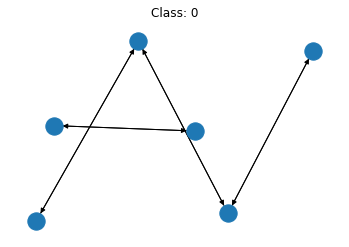

In [21]:
g, label = dataset[0]

# Data structure
print(g)

# Node Information (empty in the case of MiniGCDataset)
print(g.ndata)

# Edge Information (empty in the case of simple graphs such as Letters)
print(g.edata)

# Plot
fig, ax = plt.subplots()
G = g.to_networkx(node_attrs=['position'])
position = dict(G.nodes(data='position'))

position = {k: v.numpy() for k, v in position.items()}
nx.draw(G, ax=ax, pos=position)
ax.set_title('Class: {:d}'.format(label.item()))
plt.show()

## GNN tasks

<center width="100%" style="padding:10px"><img src="https://github.com/priba/tutorial_notebook/blob/main/aerfai_summer_school_2021/gnn_task.png?raw=1" width="800px"></center>

In this tutorial we will cover:


*   Graph Classification
*   Node classification



## Prepare DataLoader

In this stage, we will continue our tutorial with the ```MiniGCDataset``` dataset.

```torch.utils.data.DataLoader``` is an iterator which provides:


*   Data batching
*   Shuffling the data
*   Parallel data loading

In our specific case, we need to deal with graphs of many sizes. Hence, we define a new collate function makin guse of the method ```dgl.batch```.

In this example we will work with the MiniGCDataset

In [22]:
from torch.utils.data import DataLoader

def collate(samples):
    # The input `samples` is a list of pairs
    #  (graph, label).
    graphs, labels = map(list, zip(*samples))
    batched_graph = dgl.batch(graphs)
    return batched_graph, torch.tensor(labels)

# Define the corresponding subsets for train, validation and test.
trainset = dgl.data.MiniGCDataset(1000, 23, 50)
validset = dgl.data.MiniGCDataset(100, 23, 100)
testset = dgl.data.MiniGCDataset(500, 23, 100)

# Define the three dataloaders. Train data will be shuffled at each epoch
train_loader = DataLoader(trainset, batch_size=32, shuffle=True,
                         collate_fn=collate)
valid_loader = DataLoader(validset, batch_size=32, collate_fn=collate)
test_loader = DataLoader(testset, batch_size=32, collate_fn=collate)

## Define GNN model

We have two options.

*   To define our own GNN layers (see next section)
*   To use predefined GNN layers (skip to NN Modules)




### Define our own Model

To define a Graph Convolution, three functions have to be defined:

*   Message: Decide which information is sent by a node
*   Reduce: Aggregate the messages.
*   NodeApply: Update the node features that are recieved from the reduce function

<center width="100%" style="padding:10px"><img src="https://github.com/priba/tutorial_notebook/blob/main/aerfai_summer_school_2021/gnn_layer.png?raw=1" width="800px"></center>

Let us see how can we define this functions

In [23]:
import dgl.function as fn
import torch.nn as nn
import torch.nn.functional as F

# Sends a message of node feature h.
msg = fn.copy_src(src='h', out='m')
def message_func(edges):
    return {'m': edges.src['h']}

def reduce(nodes):
  """Take an average over all neighbor node features hu and use it to
  overwrite the original node feature."""
  accum = torch.sum(nodes.mailbox['m'], 1)
  return {'m': accum}

class NodeApplyModule(nn.Module):
  """Update the node feature hv with ReLU(Whv+b)."""
  def __init__(self, in_feats, out_feats, activation):
    super(NodeApplyModule, self).__init__()
    self.linear = nn.Linear(in_feats, out_feats)
    self.activation = activation

  def forward(self, node):
    h = torch.cat([node.data['h'], node.data['m']],1)
    h = self.linear(h)
    h = self.activation(h)
    return {'h' : h}  
  
class GNN(nn.Module):
  """Define a GNN layer"""
  def __init__(self, in_feats, out_feats, activation):
    super(GNN, self).__init__()
    self.apply_mod = NodeApplyModule(2*in_feats, out_feats, activation)
    
  def forward(self, g, feature):
    # Initialize the node features with h.
    g.ndata['h'] = feature
    g.update_all(msg, reduce)
    g.apply_nodes(func=self.apply_mod)
    return g.ndata.pop('h')
  
class Net(nn.Module):
  def __init__(self, in_dim, hidden_dim, n_classes):
    super(Net, self).__init__()
    self.layers = nn.ModuleList([
        GNN(in_dim, hidden_dim, F.relu),
        GNN(hidden_dim, hidden_dim, F.relu)])
    self.classify = nn.Linear(hidden_dim, n_classes)
    
  def forward(self, g):
    # For undirected graphs, in_degree is the same as
    # out_degree.
    h = g.in_degrees().view(-1, 1).float()
    
    if torch.cuda.is_available():
      h = h.cuda() 
    for conv in self.layers:
      h = conv(g, h)
    g.ndata['h'] = h
    hg = dgl.mean_nodes(g, 'h')
    return self.classify(hg)

#### Training example for graph classification

In [24]:
import torch
import torch.optim as optim

model = Net(1, 256, trainset.num_classes)
if torch.cuda.is_available():
  model = model.cuda()
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
model.train()

epoch_losses = []
for epoch in range(80):
  epoch_loss = 0
  for iter, (bg, label) in enumerate(train_loader):
    if torch.cuda.is_available():
      label = label.cuda()
      bg = bg.to(label.device)
    prediction = model(bg)
    loss = loss_func(prediction, label)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    epoch_loss += loss.detach().item()
  epoch_loss /= (iter + 1)
  print('Epoch {}, loss {:.4f}'.format(epoch, epoch_loss))
  epoch_losses.append(epoch_loss)

Epoch 0, loss 2376.8972
Epoch 1, loss 286.9153
Epoch 2, loss 178.3873
Epoch 3, loss 16.4214
Epoch 4, loss 1.8556
Epoch 5, loss 0.8579
Epoch 6, loss 0.6535
Epoch 7, loss 0.4389
Epoch 8, loss 0.4036
Epoch 9, loss 0.3616
Epoch 10, loss 0.4077
Epoch 11, loss 0.3931
Epoch 12, loss 0.3725
Epoch 13, loss 0.4433
Epoch 14, loss 0.5036
Epoch 15, loss 0.4416
Epoch 16, loss 0.4963
Epoch 17, loss 0.3066
Epoch 18, loss 0.2186
Epoch 19, loss 0.1868
Epoch 20, loss 0.1778
Epoch 21, loss 0.1415
Epoch 22, loss 0.2043
Epoch 23, loss 0.1780
Epoch 24, loss 0.2727
Epoch 25, loss 0.1919
Epoch 26, loss 0.1614
Epoch 27, loss 0.1548
Epoch 28, loss 0.1398
Epoch 29, loss 0.1280
Epoch 30, loss 0.1217
Epoch 31, loss 0.1597
Epoch 32, loss 0.1330
Epoch 33, loss 0.1231
Epoch 34, loss 0.1165
Epoch 35, loss 0.1143
Epoch 36, loss 0.1026
Epoch 37, loss 0.0946
Epoch 38, loss 0.0938
Epoch 39, loss 0.0870
Epoch 40, loss 0.0825
Epoch 41, loss 0.0790
Epoch 42, loss 0.0743
Epoch 43, loss 0.0745
Epoch 44, loss 0.0700
Epoch 45, lo

#### Evaluation

In [25]:
def accuracy(output, target):
  """Accuacy given a logit vector output and a target class
  """
  _, pred = output.topk(1)
  pred = pred.squeeze()
  correct = pred == target
  correct = correct.float()
  return correct.sum() * 100.0 / correct.shape[0]


model.eval()
acc = 0
with torch.no_grad():
  for iter, (bg, label) in enumerate(test_loader):
    if torch.cuda.is_available():
        label = label.cuda()
        bg = bg.to(label.device)
    prediction = model(bg)
    acc += accuracy(prediction, label) * label.shape[0]
acc = acc/len(testset)

print('Test accuracy {:.4f}'.format(acc))

Test accuracy 91.8000


#### Let us see some qualitative results

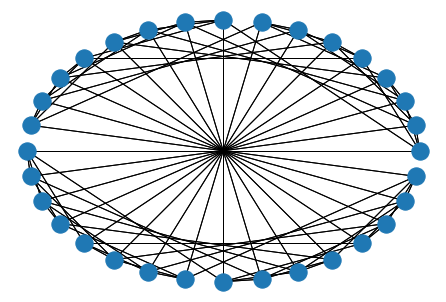

Label 4; Prediction 4


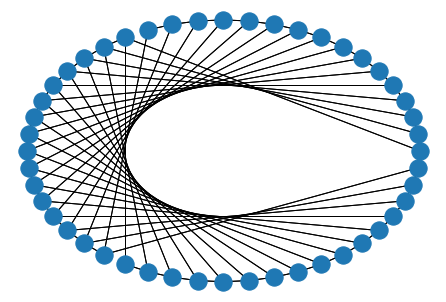

Label 5; Prediction 5


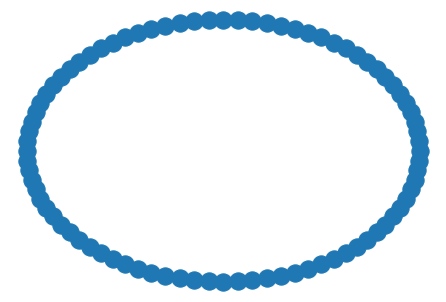

Label 5; Prediction 5


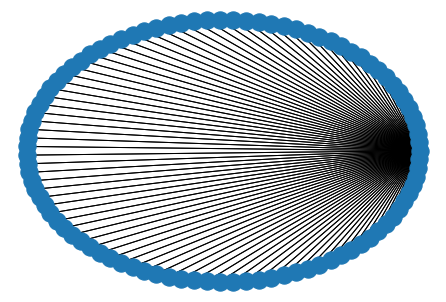

Label 2; Prediction 2


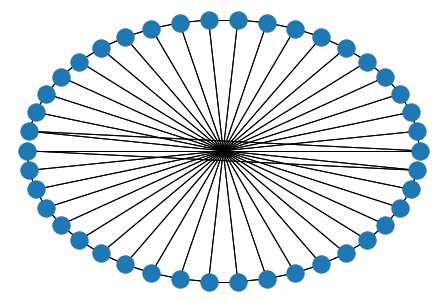

Label 7; Prediction 7


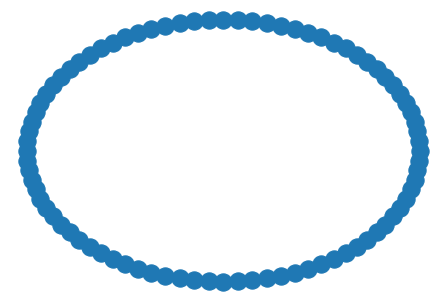

Label 5; Prediction 5


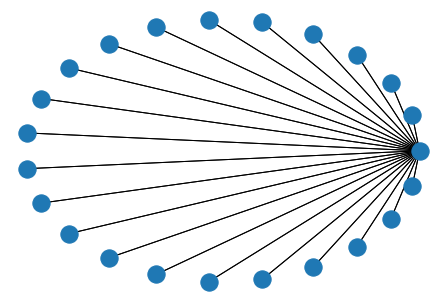

Label 1; Prediction 1


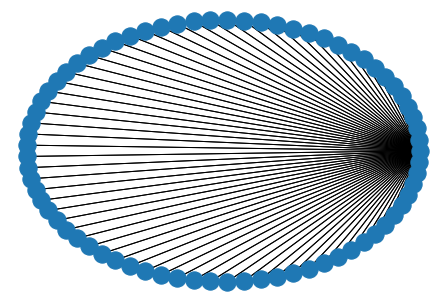

Label 1; Prediction 1


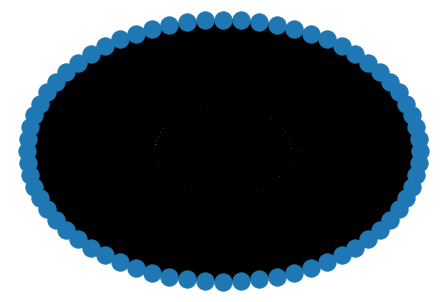

Label 6; Prediction 6


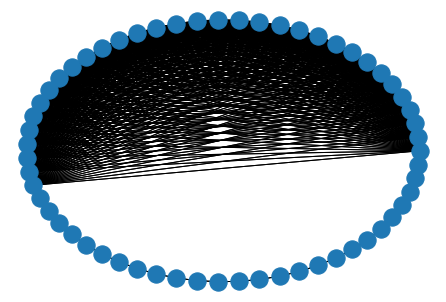

Label 3; Prediction 3


In [26]:
from random import randrange
import matplotlib.pyplot as plt
for i in range(10):
  index = randrange(len(testset))
  g, label = testset[index]
  pred = model(g.to('cuda'))
  _, pred = pred.topk(1)
  G = g.to_networkx()
  plt.figure(i)
  nx.draw(G, pos=nx.circular_layout(G), arrows=False)
  plt.show()
  print('Label {}; Prediction {}'.format(label, pred.item()))

### NN Modules

Several GNN layers are provided by default as [NN Modules](https://docs.dgl.ai/api/python/nn.pytorch.html#graphconv).

**Choose the network to use, either with NN Modules or defining it as it has been shown before.**

Lets see one example with the classical GraphConv

$$
h_i^{(l+1)} = \sigma(b^{(l)} + \sum_{j\in\mathcal{N}(i)}\frac{1}{c_{ji}}h_j^{(l)}W^{(l)})
$$

In [27]:
from dgl.nn.pytorch import GraphConv

class Net(nn.Module):
  def __init__(self, in_dim, hidden_dim, n_classes):
    super(Net, self).__init__()
    self.layers = nn.ModuleList([
        GraphConv(in_dim, hidden_dim, activation=F.relu),
        GraphConv(hidden_dim, hidden_dim, activation=F.relu)])
    self.classify = nn.Linear(hidden_dim, n_classes)
    
  def forward(self, g):
    # Use node degree as the initial node feature. For undirected graphs, the in-degree
    # is the same as the out_degree.
    h = g.in_degrees().view(-1, 1).float()
    
    if torch.cuda.is_available():
      h = h.cuda() 
      
    for conv in self.layers:
      h = conv(g, h)
      
    g.ndata['h'] = h
    hg = dgl.mean_nodes(g, 'h')
    return self.classify(hg)

#### Training example for graph classification

In [28]:
import torch
import torch.optim as optim

model = Net(1, 256, trainset.num_classes)
if torch.cuda.is_available():
  model = model.cuda()
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
model.train()

epoch_losses = []
for epoch in range(80):
  epoch_loss = 0
  for iter, (bg, label) in enumerate(train_loader):
    if torch.cuda.is_available():
      label = label.cuda()
      bg = bg.to(label.device)
    prediction = model(bg)
    loss = loss_func(prediction, label)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    epoch_loss += loss.detach().item()
  epoch_loss /= (iter + 1)
  print('Epoch {}, loss {:.4f}'.format(epoch, epoch_loss))
  epoch_losses.append(epoch_loss)

Epoch 0, loss 1.8984
Epoch 1, loss 1.2517
Epoch 2, loss 0.7685
Epoch 3, loss 0.6398
Epoch 4, loss 0.5788
Epoch 5, loss 0.5318
Epoch 6, loss 0.5913
Epoch 7, loss 0.5708
Epoch 8, loss 0.5027
Epoch 9, loss 0.4263
Epoch 10, loss 0.4286
Epoch 11, loss 0.4375
Epoch 12, loss 0.4087
Epoch 13, loss 0.3679
Epoch 14, loss 0.3791
Epoch 15, loss 0.4118
Epoch 16, loss 0.3346
Epoch 17, loss 0.3421
Epoch 18, loss 0.3045
Epoch 19, loss 0.3018
Epoch 20, loss 0.2607
Epoch 21, loss 0.2808
Epoch 22, loss 0.2787
Epoch 23, loss 0.2753
Epoch 24, loss 0.2435
Epoch 25, loss 0.2321
Epoch 26, loss 0.1892
Epoch 27, loss 0.2393
Epoch 28, loss 0.1918
Epoch 29, loss 0.1875
Epoch 30, loss 0.1762
Epoch 31, loss 0.1297
Epoch 32, loss 0.1397
Epoch 33, loss 0.1409
Epoch 34, loss 0.0971
Epoch 35, loss 0.1059
Epoch 36, loss 0.0904
Epoch 37, loss 0.0766
Epoch 38, loss 0.1748
Epoch 39, loss 0.4053
Epoch 40, loss 0.1457
Epoch 41, loss 0.1119
Epoch 42, loss 0.1532
Epoch 43, loss 0.0730
Epoch 44, loss 0.0663
Epoch 45, loss 0.115

#### Evaluation

In [29]:
def accuracy(output, target):
  """Accuacy given a logit vector output and a target class
  """
  _, pred = output.topk(1)
  pred = pred.squeeze()
  correct = pred == target
  correct = correct.float()
  return correct.sum() * 100.0 / correct.shape[0]


model.eval()
acc = 0
with torch.no_grad():
  for iter, (bg, label) in enumerate(test_loader):
    if torch.cuda.is_available():
        label = label.cuda()
        bg = bg.to(label.device)
    prediction = model(bg)
    acc += accuracy(prediction, label) * label.shape[0]
acc = acc/len(testset)

print('Test accuracy {:.4f}'.format(acc))

Test accuracy 88.8000


#### Plot results

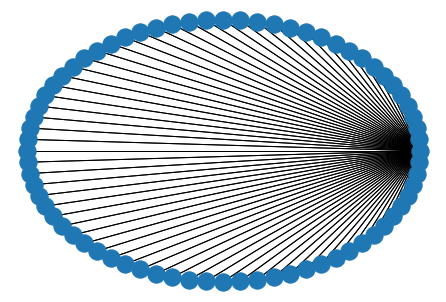

Label 1; Prediction 1


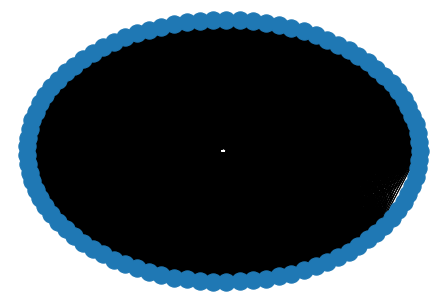

Label 3; Prediction 3


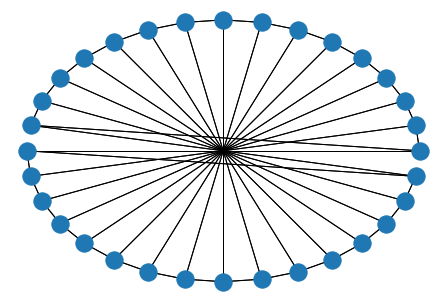

Label 7; Prediction 7


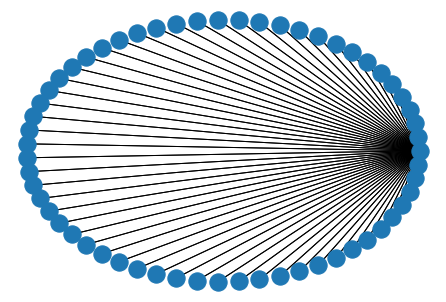

Label 1; Prediction 1


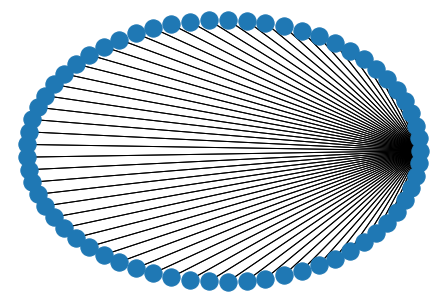

Label 1; Prediction 1


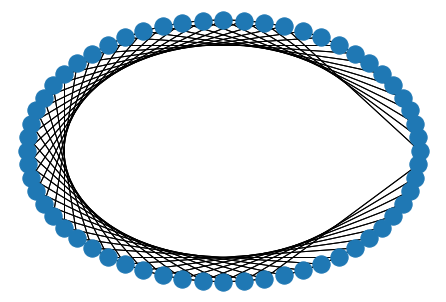

Label 5; Prediction 5


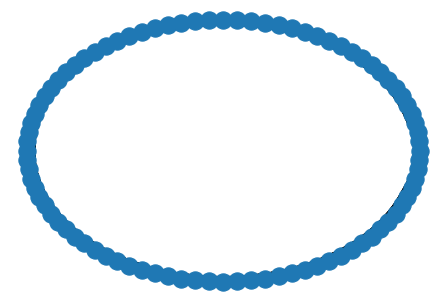

Label 5; Prediction 5


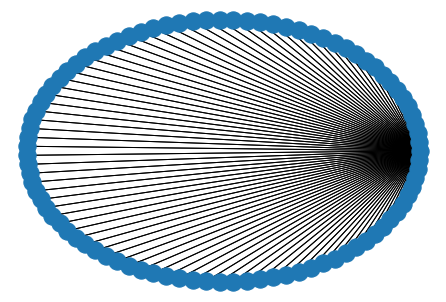

Label 1; Prediction 1


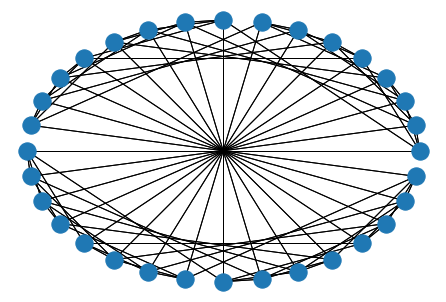

Label 4; Prediction 4


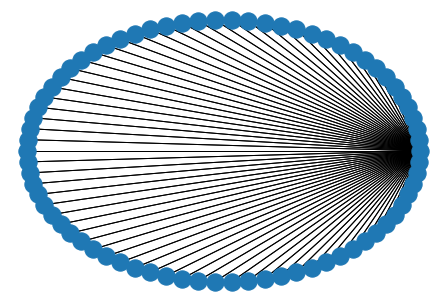

Label 1; Prediction 1


In [30]:
from random import randrange
import matplotlib.pyplot as plt
for i in range(10):
  index = randrange(len(testset))
  g, label = testset[index]
  pred = model(g.to('cuda'))
  _, pred = pred.topk(1)
  G = g.to_networkx()
  plt.figure(i)
  nx.draw(G, pos=nx.circular_layout(G), arrows=False)
  plt.show()
  print('Label {}; Prediction {}'.format(label, pred.item()))

## Node classification example

We will study this problem with the Cora Graph Dataset

### Define the data

In [31]:
dataset = dgl.data.CoraGraphDataset()

  NumNodes: 2708
  NumEdges: 10556
  NumFeats: 1433
  NumClasses: 7
  NumTrainingSamples: 140
  NumValidationSamples: 500
  NumTestSamples: 1000
Done loading data from cached files.


### Define the model

Note that now, we do not require a global pooling (Readout function).

In [32]:
class Net(nn.Module):
  def __init__(self, in_dim, hidden_dim, n_classes):
    super(Net, self).__init__()
    self.layers = nn.ModuleList([
        GraphConv(in_dim, hidden_dim, activation=F.relu),
        GraphConv(hidden_dim, hidden_dim, activation=F.relu)])
    self.classify = nn.Linear(hidden_dim, n_classes)
    
  def forward(self, g):
    # Use node degree as the initial node feature. For undirected graphs, the in-degree
    # is the same as the out_degree.
    h = g.in_degrees().view(-1, 1).float()
    
    if torch.cuda.is_available():
      h = h.cuda() 
      
    for conv in self.layers:
      h = conv(g, h)
    
    h = self.classify(h)
    g.ndata['h'] = h
    return h

### Training example for node classification

In [34]:
import torch
import torch.optim as optim

model = Net(1, 256, trainset.num_classes)
if torch.cuda.is_available():
  model = model.cuda()
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
model.train()

epoch_losses = []
for epoch in range(80):
  epoch_loss = 0
  for iter, (bg, label) in enumerate(train_loader):
    if torch.cuda.is_available():
      label = label.cuda()
      bg = bg.to(label.device)
    prediction = model(bg)
    import pdb; pdb.set_trace()
    loss = loss_func(prediction, label)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    epoch_loss += loss.detach().item()
  epoch_loss /= (iter + 1)
  print('Epoch {}, loss {:.4f}'.format(epoch, epoch_loss))
  epoch_losses.append(epoch_loss)


PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/lib/python3.7/bdb.py", line 332, in set_trace
    sys.settrace(self.trace_dispatch)



> <ipython-input-34-8e9957349bd4>(20)<module>()
-> loss = loss_func(prediction, label)
(Pdb) prediction
tensor([[-0.1265, -0.3070,  0.0531,  ...,  0.0392, -0.1594,  0.1081],
        [-0.1265, -0.3070,  0.0531,  ...,  0.0392, -0.1594,  0.1081],
        [-0.1265, -0.3070,  0.0531,  ...,  0.0392, -0.1594,  0.1081],
        ...,
        [-0.0766, -0.2104,  0.0516,  ...,  0.0312, -0.0959,  0.0751],
        [-0.0766, -0.2104,  0.0516,  ...,  0.0312, -0.0959,  0.0751],
        [-0.0766, -0.2104,  0.0516,  ...,  0.0312, -0.0959,  0.0751]],
       device='cuda:0', grad_fn=<AddmmBackward>)
(Pdb) prediction.shape
torch.Size([1101, 8])
(Pdb) bg
Graph(num_nodes=1101, num_edges=13595,
      ndata_schemes={'h': Scheme(shape=(8,), dtype=torch.float32)}
      edata_schemes={})
(Pdb) print(g.ndata['train_mask']) 
*** KeyError: 'train_mask'
(Pdb) q



PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/lib/python3.7/bdb.py", line 357, in set_quit
    sys.settrace(None)



BdbQuit: ignored

# Other resources



*   https://nn.labml.ai/graphs/gat/index.html

